In [1]:
! pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv('forest_health_data.csv') 

   Plot_ID   Latitude   Longitude        DBH  Tree_Height  \
0        1  24.981605 -117.040695  29.862040    20.835684   
1        2  48.028572  -92.066934  28.462986    24.307079   
2        3  39.279758  -68.893791  91.094185     9.013101   
3        4  33.946339  -78.744258  28.706889    19.496475   
4        5  16.240746  -73.540720  30.835224    18.008888   

   Crown_Width_North_South  Crown_Width_East_West      Slope    Elevation  \
0                 6.147963               4.542720  29.171563   212.518419   
1                 8.248891               5.260921   7.757386   641.640332   
2                 7.841448               8.690927  39.257755  2510.612835   
3                 2.385099               4.060039  27.590231  2323.628233   
4                 2.343245               8.826847   7.074175  1116.863805   

    Soil_TN   Soil_TP   Soil_AP   Soil_AN  Menhinick_Index  Gleason_Index  \
0  0.723065  0.457221  0.189952  0.268850         2.135766       4.897271   
1  0.690410  0.2

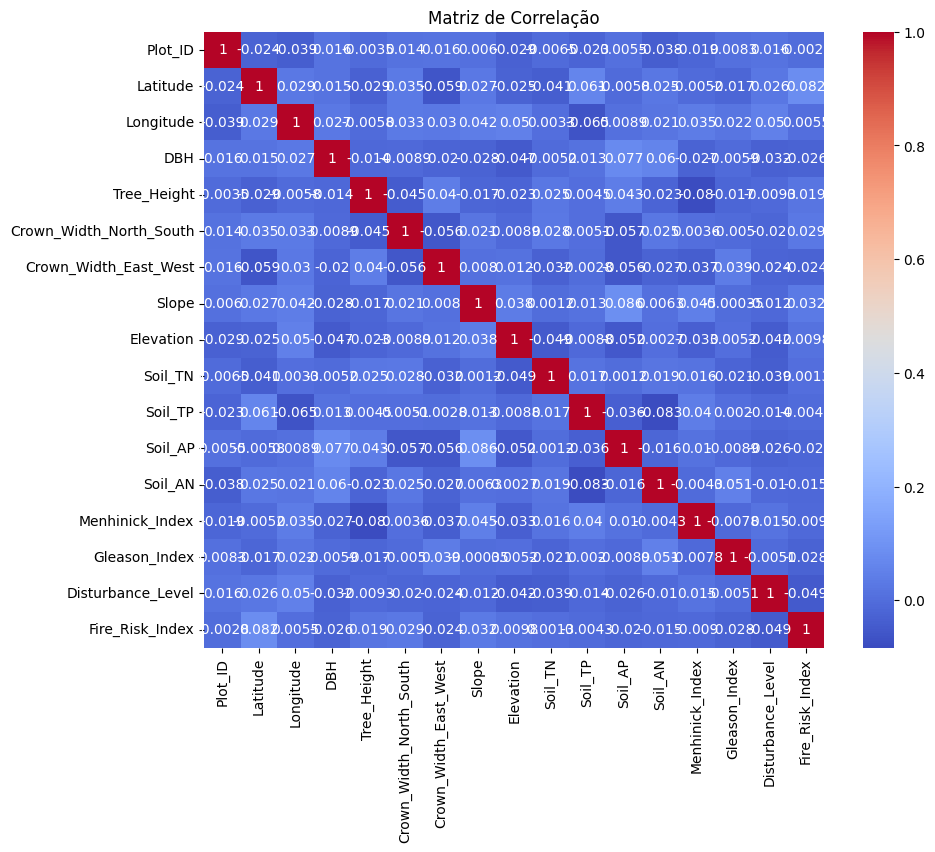

In [4]:
print(df.head())

print(df.info())

print(df.describe())

plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


In [5]:
print(df.columns.tolist())

['Plot_ID', 'Latitude', 'Longitude', 'DBH', 'Tree_Height', 'Crown_Width_North_South', 'Crown_Width_East_West', 'Slope', 'Elevation', 'Soil_TN', 'Soil_TP', 'Soil_AP', 'Soil_AN', 'Menhinick_Index', 'Gleason_Index', 'Disturbance_Level', 'Fire_Risk_Index', 'Health_Status']


In [ ]:
features = ['DBH', 'Slope', 'Elevation', 'Soil_TN', 'Soil_TP', 'Soil_AP', 'Soil_AN']
target = 'Tree_Height'

df = df.dropna(subset=features + [target])

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = modelo.predict(X_test)
print(f"R²: {r2_score(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")


R²: -0.01
MSE: 63.47


C:\Users\geovanans\AppData\Local\Temp\ipykernel_21176\4163172241.py:5: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\geovanans\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


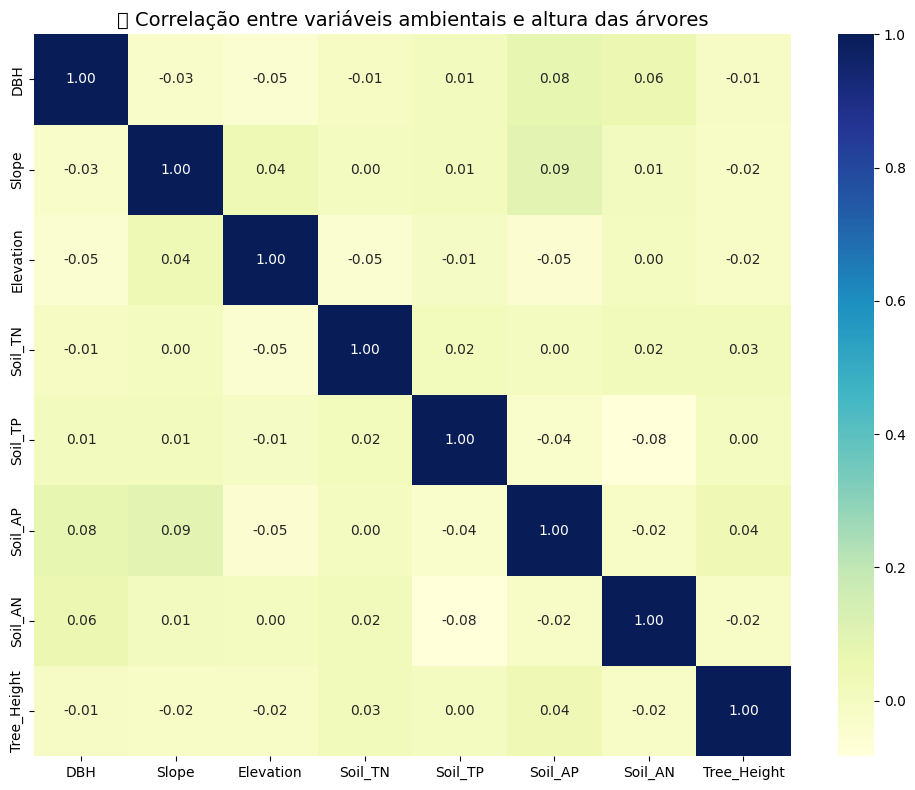

In [14]:

corr = df[['DBH', 'Slope', 'Elevation', 'Soil_TN', 'Soil_TP', 'Soil_AP', 'Soil_AN', 'Tree_Height']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('🌲 Correlação entre variáveis ambientais e altura das árvores', fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\geovanans\AppData\Local\Temp\ipykernel_21176\2136411504.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\geovanans\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


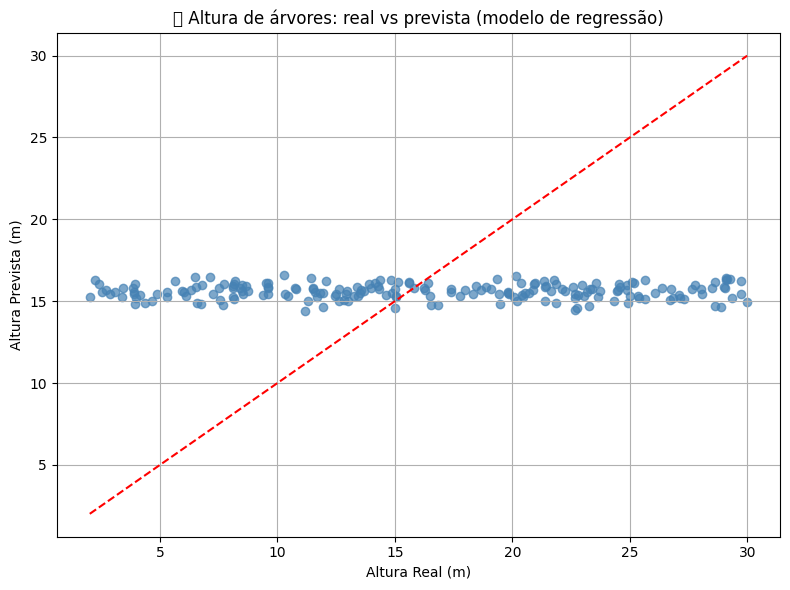

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="#4682B4")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Altura Real (m)')
plt.ylabel('Altura Prevista (m)')
plt.title('📊 Altura de árvores: real vs prevista (modelo de regressão)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\geovanans\AppData\Local\Temp\ipykernel_21176\4256353937.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coeficiente', y='Variável', palette='Greens_r')


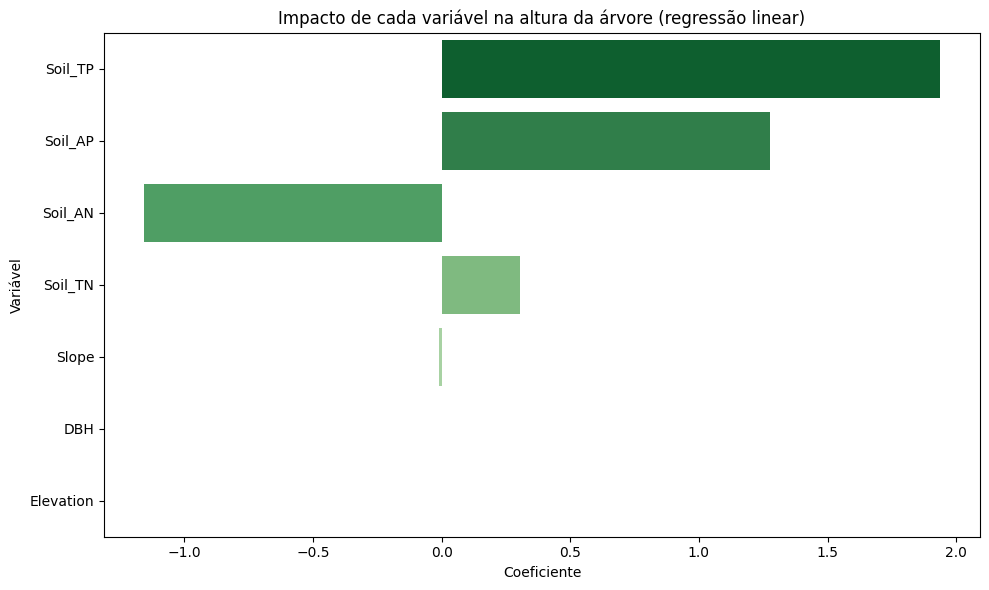

In [12]:
coef_df = pd.DataFrame({
    'Variável': features,
    'Coeficiente': modelo.coef_
}).sort_values(by='Coeficiente', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x='Coeficiente', y='Variável', palette='Greens_r')
plt.title('Impacto de cada variável na altura da árvore (regressão linear)')
plt.tight_layout()
plt.show()
